# Part II - (Loan Data From Prosper)
## by (Sulyman Ahmed)

## Dataset Overview

Out of the 81 columns I choosed the data set I would focus on into a data fram which includes
* Term: The length of the loan expressed in months.	
* LoanStatus: The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
* EmploymentStatus:The employment status of the borrower at the time they posted the listing.
* IsBorrowerHomeowner: A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.
* LoanOriginalAmount: The origination amount of the loan.
* Listing_category: The category of the listing that the borrower selected when posting their listing
* CreditScoreRangeLower: The lower value representing the range of the borrower's credit score as provided by a consumer credit rating agency.
* CreditScoreRangeUpper: The upper value representing the range of the borrower's credit score as provided by a consumer credit rating agency. 
* StatedMonthlyIncome: The monthly income the borrower stated at the time the listing was created.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('prosperLoanData.csv')

In [3]:
# creating a data frame for the columns that are needed in this analysis
cols = ['Term','LoanStatus','ListingCategory (numeric)','EmploymentStatus','IsBorrowerHomeowner',
        'CreditScoreRangeLower','CreditScoreRangeUpper','StatedMonthlyIncome','LoanOriginalAmount','MonthlyLoanPayment']
new_df = df[cols]

In [4]:
# making a copy of the data set
loan_data=new_df.copy()

In [5]:
loan_data['EmploymentStatus'].fillna('Not available', inplace=True)
loan_data.dropna(subset=['CreditScoreRangeLower', 'CreditScoreRangeUpper'], inplace=True)

In [6]:
# little function to cluster score
def Credit_score(x):
    outcome=""
    if x >= 300 :
        outcome = "Poor"
    if x>=550:
        outcome = "Fair"
    if x>=650:
        outcome = "Good"
    if x>=750:
        outcome = "Excellent"
    return outcome

In [7]:
loan_data['CreditScore'] = loan_data['CreditScoreRangeLower'].apply(Credit_score)

In [8]:
# Drop the redundant columns
cols = ['CreditScoreRangeLower','CreditScoreRangeUpper']
loan_data.drop(columns=cols , axis=1 , inplace=True)

In [9]:
order = ['Poor','Fair','Good','Excellent']
order_class = pd.api.types.CategoricalDtype(ordered=True ,categories= order)
loan_data['CreditScore'] = loan_data['CreditScore'].astype(order_class)

In [10]:
def H_M_Yers(x):
    return x/12

loan_data['Term'] = loan_data['Term'].apply(H_M_Yers).astype(int)

In [11]:
index = loan_data[loan_data['StatedMonthlyIncome']==0].index
loan_data.drop(index,inplace=True)
index = loan_data[loan_data['StatedMonthlyIncome']>=12500].index
loan_data.drop(index,inplace=True)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)
### What is the relationship between LoanStatus and (StatedMonthlyIncome, MonthlyLoanPayment, LoanOriginalAmount)

* The observation from the plot shows that there is a negative correlation between monthly income and Loan status borrowers that passed their due date have a lower income but that is true from past due 1-15 days and borrowers that passed their due date > 120 days have a short distribution in monthly income and there is a slightly positive correlation that borrowers that pass their due data ask for a higher loan amount.

In [12]:
num_var = ['StatedMonthlyIncome','MonthlyLoanPayment','LoanOriginalAmount']
ordr = ['Current','Completed','Chargedoff','FinalPaymentInProgress','Past Due (1-15 days)','Past Due (16-30 days)'
        ,'Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)','Defaulted','Cancelled']

def boxplott(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color,order=ordr)
    plt.xticks(rotation=90)

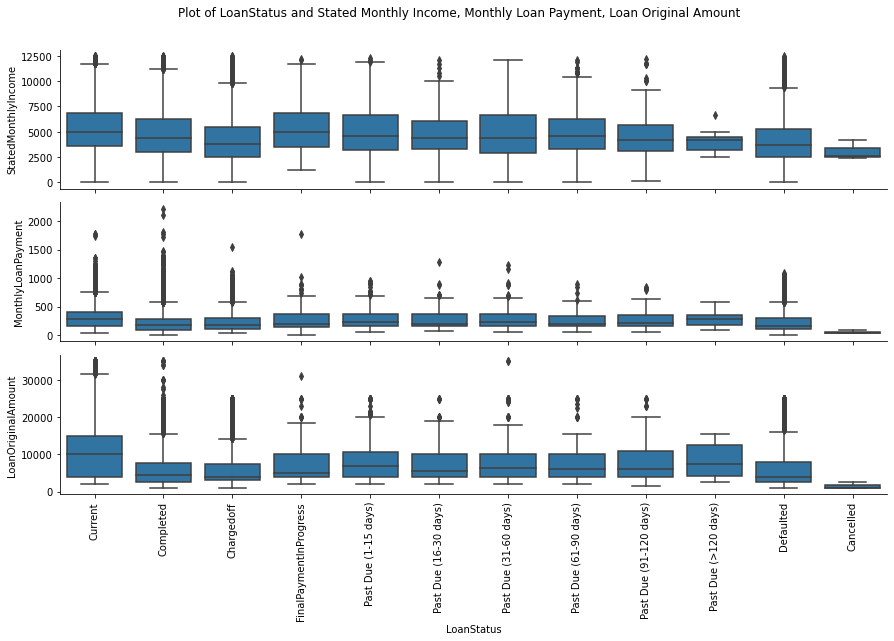

In [13]:
g = sb.PairGrid(data = loan_data, y_vars = num_var, x_vars = 'LoanStatus',
                height = 2.5, aspect = 5)
g.map(boxplott);
g.fig.subplots_adjust(top=.9);
g.fig.suptitle('Plot of LoanStatus and Stated Monthly Income, Monthly Loan Payment, Loan Original Amount');

## (Visualization 2)
### Where is the most skewed range of the stated monthly income of the borrowers ?

* in range 2000 to 6000

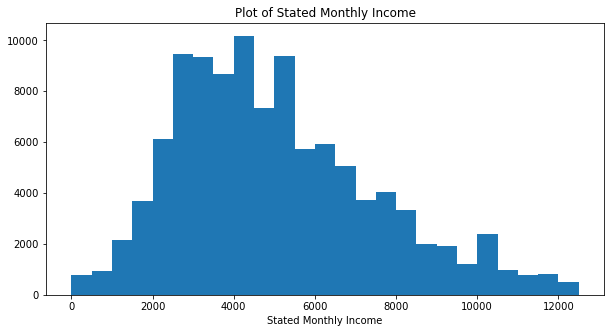

In [14]:
x_bins = np.arange(0,loan_data.StatedMonthlyIncome.max()+500,500)
plt.figure(figsize=[10,5])
plt.hist(x=loan_data.StatedMonthlyIncome,bins = x_bins);
plt.title("Plot of Stated Monthly Income");
plt.xlabel("Stated Monthly Income");


## (Visualization 3)
### How does the three numerical feature play into the relationship between Loan Status and its Term?

* There is a negative correlation between monthly income and delay in repayment when borrowers ask for 1 term loan
* Low income of the borrowers leads to delay on repayment
* When the loan is of high amount, the monthly payment of the loan is large and the monthly income is low
* There is larger monthly loan payment of loans when the loan is for one year.


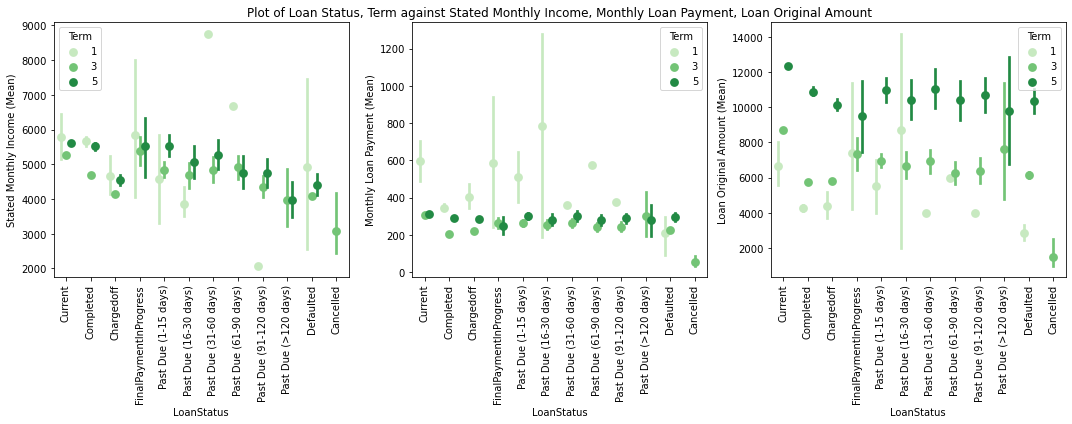

In [15]:
tittle='Plot of Loan Status, Term against Stated Monthly Income, Monthly Loan Payment, Loan Original Amount'
fig, ax = plt.subplots(ncols = 3, figsize = [15,6])
sb.pointplot(data = loan_data, x = 'LoanStatus', y = 'StatedMonthlyIncome', hue = 'Term',order=ordr,
             palette = 'Greens', linestyles = '', dodge = 0.4, ax = ax[0])

ax[0].set_ylabel('Stated Monthly Income (Mean)')
ax[0].set_yticklabels([],minor = True)
ax[0].set_xticklabels(ordr,rotation = 90)

sb.pointplot(data = loan_data, x = 'LoanStatus', y = 'MonthlyLoanPayment', hue = 'Term',order=ordr,
             palette = 'Greens', linestyles = '', dodge = 0.4, ax = ax[1]).set(title=tittle)
ax[1].set_ylabel('Monthly Loan Payment (Mean)')
ax[1].set_yticklabels([],minor = True)
ax[1].set_xticklabels(ordr,rotation = 90)
sb.pointplot(data = loan_data, x = 'LoanStatus', y = 'LoanOriginalAmount', hue = 'Term',order=ordr,
             palette = 'Greens', linestyles = '', dodge = 0.4, ax = ax[2])
ax[2].set_ylabel('Loan Original Amount (Mean)')
ax[2].set_yticklabels([],minor = True)
ax[2].set_xticklabels(ordr,rotation = 90)

plt.tight_layout()
plt.show();

In [16]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 700241 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\ProgramData\Anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 346, in start
    self.convert_notebooks()
  File "C:\ProgramData\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 518, in convert_notebooks
    self.convert_single_notebook(notebook_